# Entrenamiento y validacion de modelos

En esta seccion se realiza el entrenamiento y validacion de los siguientes modelos:

- Arbol de decision.
- Metodo de ensamble: Random Forest.
- RNA: Sequential (Keras).
- Modelo a eleccion: SVM (Support Vector Machine).

Se realiza la validacion del modelo utilizando el conjunto de datos de validacion obtenidos en la etapa de preprocesamiento. Se muestran las siguientes metricas:

#### Accuracy 
Proporción total de predicciones correctas sobre todas las muestras.

#### Precision
Proporción de muestras predichas como positivas que realmente lo son.

#### Recall
Proporción de positivos reales que el modelo logra identificar.

#### F1-Score
Media armónica entre precisión y recall. Resume ambas métricas en un solo valor, siendo útil cuando hay clases desbalanceadas y necesitás un equilibrio entre precisión y sensibilidad.

#### Matriz de confusion
Permite identificar no solo qué tan bien predice el modelo, sino cómo se equivoca (por ejemplo, si confunde muchos positivos con negativos).

#### ROC-AUC
Área bajo la curva ROC, que representa el rendimiento del modelo para distintos umbrales de decisión.

## Arbol de decision

El arbol de decision que se entrena a continuacion es DecisionTreeClassifier, que se encuentra en la libreria de python SkLearn.
Los hiperaparametros que se eligieron para el entrenamiento de este modelo son los que se encuentran por default.

### Entrenamiento

In [1]:
import sys
import os
import pandas as pd

ROOT = os.path.abspath("..")  # subir desde data
sys.path.append(ROOT)

from backend.model.arbol.DecisionTree import DecisionTree

X_train = pd.read_csv(os.path.join(ROOT, "data/train/X_train_scaled.csv"))
y_train = pd.read_csv(os.path.join(ROOT, "data/train/y_train.csv")).values.ravel()

X_test = pd.read_csv(os.path.join(ROOT, "data/test/X_valid_scaled.csv"))
y_test = pd.read_csv(os.path.join(ROOT, "data/test/y_valid.csv")).values.ravel()

dt = DecisionTree(class_weight='balanced', name='Decision Tree Titanic')
accuracy_dt = dt.train(X_train, y_train)
print(f"Train accuracy: {accuracy_dt}")

dt.save_model(f"{ROOT}/backend/model/arbol/decision_tree_titanic.pkl")

[OK] Decision Tree Titanic entrenado.
Train accuracy: 0.9831460674157303
[OK] Modelo guardado en d:\Universidad\2025\sistemas-soporte\tp-final\dss-titanic/backend/model/arbol/decision_tree_titanic.pkl.


### Validacion


===== RESULTADOS =====
Accuracy: 0.7877
Precision: 0.7460
Recall: 0.6812
F1 Score: 0.7121

Reporte completo:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       110
           1       0.75      0.68      0.71        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



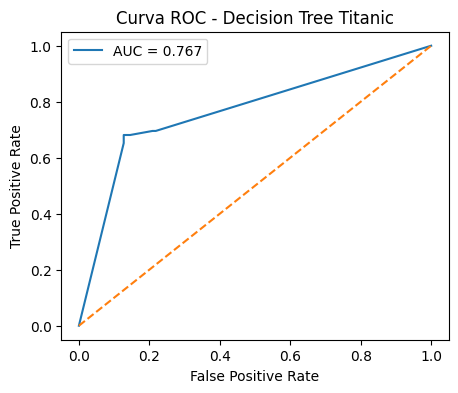

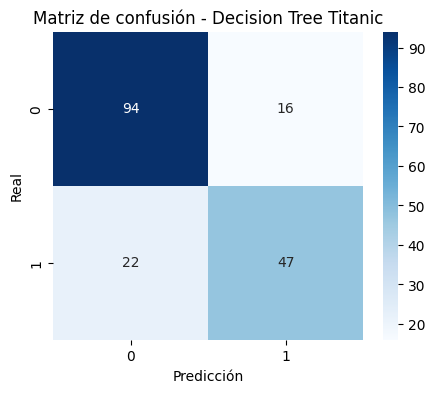

In [2]:
metricas = dt.validate(X_test, y_test)
dt.plot_roc_curve()
dt.plot_confusion_matrix()

## Random Forest

El modelo que se entrena a continuacion es Random Forest, que se encuentra en la libreria SkLearn de python. Se ajustaron los siguientes hiperparametros para obtener mejor rendimiento:
* n_estimators: numero de arboles.
* max_depth: maxima profundidad del arbol.
* min_samples_split: mínimo número de muestras necesarias para que un nodo pueda dividirse.
* min_samples_leaf: Es el número mínimo de muestras que debe tener un nodo hoja.
* class_weight: es un parámetro que permite asignar pesos diferentes a cada clase al momento de entrenar un modelo de clasificación.

### Entrenamiento

In [3]:
from backend.model.random_forest.RandomForest import RandomForest

rf = RandomForest(
    n_estimators=1000,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    name='Random Forest Titanic'
)

accuracy_rf = rf.train(X_train, y_train)
print(f"Train accuracy: {accuracy_rf}")
rf.save_model(f"{ROOT}/backend/model/random_forest/random_forest_titanic.pkl")

[OK] Random Forest Titanic entrenado.
Train accuracy: 0.925561797752809
[OK] Modelo guardado en d:\Universidad\2025\sistemas-soporte\tp-final\dss-titanic/backend/model/random_forest/random_forest_titanic.pkl.


### Validacion


===== RESULTADOS =====
Accuracy: 0.8156
Precision: 0.7812
Recall: 0.7246
F1 Score: 0.7519

Reporte completo:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.72      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



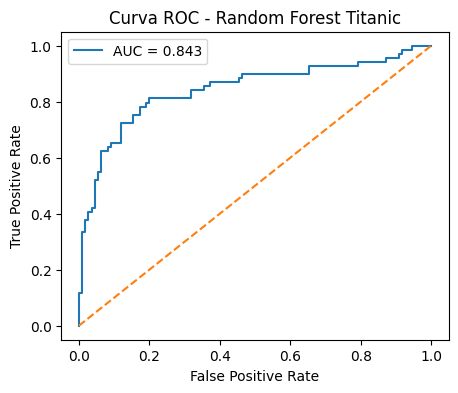

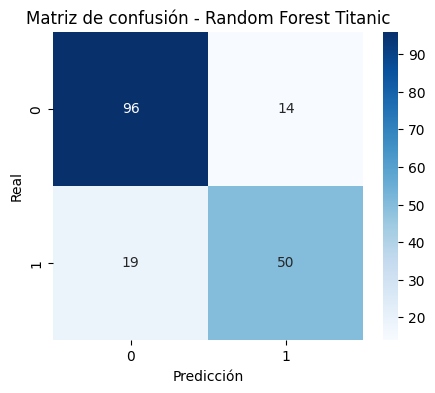

In [4]:
metricas = rf.validate(X_test, y_test)
rf.plot_roc_curve()
rf.plot_confusion_matrix()

## Red Neuronal Artificial

Para este caso, se utilizo la libreria de tensorflow para entrar una RNA. Se utiliza el modelo Sequential que esta en Keras. Se utiliza el optimizador Adam, y se cuenta con las siguientes capas:
- La primera es de 32 nodos.
- La segunda es de 16 nodos.
- La tercera es de 8 nodos.
- La ultima es de 1 nodo.

Todas las capas internas usan ReLU, una función que ayuda al modelo a aprender relaciones no lineales.
La última capa usa sigmoid, que devuelve un número entre 0 y 1 (una probabilidad).

In [5]:
from backend.model.rna.KerasModel import KerasModel
from backend.model.rna.build_rna import build_rna_model

rna = KerasModel(
    build_fn=lambda: build_rna_model(X_train.shape[1]),
    name='RNA Titanic'
)

history = rna.train(X_train, y_train, epochs=1000, batch_size=32)
rna.save_model(f"{ROOT}/backend/model/rna/rna_titanic.h5")

C:\Users\Andres\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[OK] Modelo guardado en d:\Universidad\2025\sistemas-soporte\tp-final\dss-titanic/backend/model/rna/rna_titanic.h5


### Validacion

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

===== RESULTADOS =====
Accuracy: 0.7989
Precision: 0.7895
Recall: 0.6522
F1 Score: 0.7143

Reporte completo:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       110
           1       0.79      0.65      0.71        69

    accuracy                           0.80       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



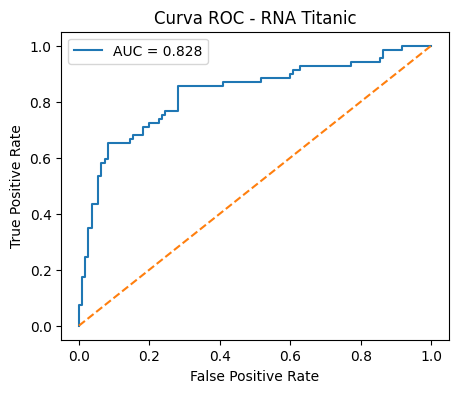

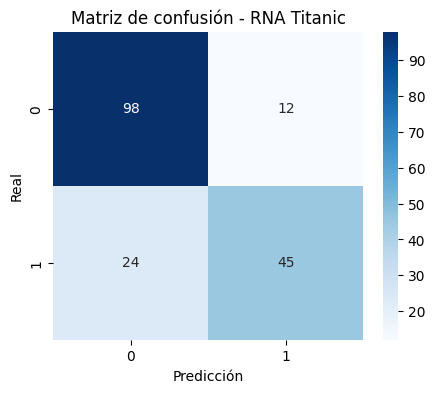

In [6]:
metricas = rna.validate(X_test, y_test)
print("\n===== RESULTADOS =====")
print(f"Accuracy: {metricas['accuracy']:.4f}")
print(f"Precision: {metricas['precision']:.4f}")
print(f"Recall: {metricas['recall']:.4f}")
print(f"F1 Score: {metricas['f1']:.4f}")
print("\nReporte completo:\n", metricas["report"])
rna.plot_roc_curve()
rna.plot_confusion_matrix()

## SVM (Support Vector Machine)

El modelo utilizado es el que se encuentra en la libreria de python SkLearn, la misma es SVC (Support Vector Classification). Se ajustaron algunos hiperparametros para obtener mejores resultados:
* class_weight: es un parámetro que permite asignar pesos diferentes a cada clase al momento de entrenar un modelo de clasificación.
* kernel: se utiliza rbf, que transforma los datos a un espacio de mayor dimensión donde es más fácil separarlos con una frontera no lineal.

### Entrenamiento

In [ ]:
from backend.model.svm.SVM import SVM

svm = SVM(
    C=0.5,
    class_weight='balanced',
    kernel='rbf',
    name='SVM Titanic'
)

accuracy_svm = svm.train(X_train, y_train)
print(f"Train accuracy: {accuracy_svm}")
svm.save_model(f"{ROOT}/backend/model/svm/svm_titanic.pkl")

[OK] SVM Titanic entrenado.
Train accuracy: 0.8328651685393258


### Validacion


===== RESULTADOS =====
Accuracy: 0.8212
Precision: 0.7761
Recall: 0.7536
F1 Score: 0.7647

Reporte completo:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86       110
           1       0.78      0.75      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



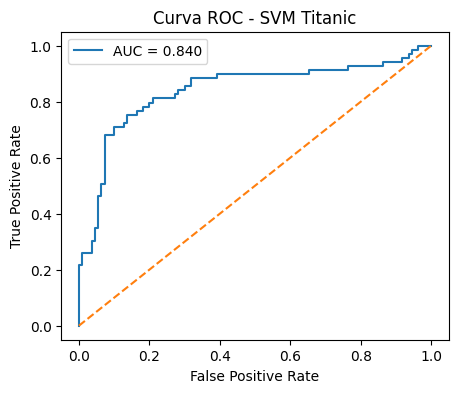

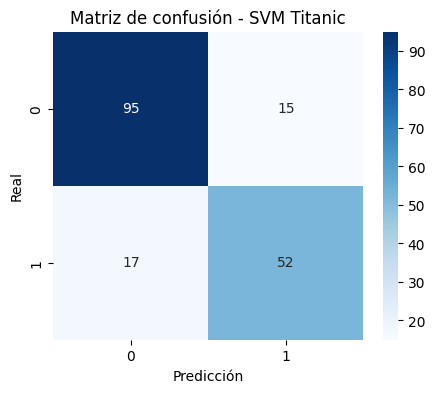

In [8]:
metricas = svm.validate(X_test, y_test)
svm.plot_roc_curve()
svm.plot_confusion_matrix()

# Analisis de los resultados y comparacion de modelos

| Modelo             | Accuracy | Precision (1) | Recall (1) | F1 Score (1) | AUC (ROC) |
|--------------------|----------|---------------|------------|--------------|-----------|
| SVM                | 0.8156   | 0.7647        | 0.7536     | 0.7591       | 0.842     |
| Random Forest      | 0.8156   | 0.7812        | 0.7246     | 0.7519       | 0.843     |
| Red Neuronal (RNA) | 0.7989   | 0.7895        | 0.6522     | 0.7143       | 0.828     |
| Árbol de Decisión  | 0.7877   | 0.7460        | 0.6812     | 0.7121       | 0.767     |

### SVM
SVM se destaca como el modelo más equilibrado por las siguientes razones:
- Mejor F1-Score (0.7591): Esta es la métrica más importante cuando las clases no están perfectamente balanceadas (hay más fallecidos que supervivientes). Indica que el SVM tiene el mejor equilibrio entre encontrar a todos los supervivientes y no equivocarse al hacerlo.
- Mejor Recall (0.7536): Fue el modelo que más supervivientes reales detectó (52 de 69, ver matriz de confusión). Solo se le escaparon 17 (Falsos Negativos), comparado con los 19 del Random Forest y los 24 de la RNA.
- Empate en Accuracy: Comparte la exactitud más alta con Random Forest (81.56%).

### Random Forest (RF)
Casi idéntico al SVM en rendimiento general:

- Mejor AUC (0.843): Tiene la mejor capacidad general para distinguir entre clases a través de diferentes umbrales, aunque la diferencia con el SVM (0.842) es despreciable (0.001).
- Mayor Precisión que SVM: Es un poco más "cuidadoso" al predecir supervivientes. Comete menos errores de "Falsos Positivos" (14 vs 16 del SVM), pero a costa de detectar menos supervivientes en total.

### Red Neuronal (RNA)
- Alta Precisión (0.7895): Este modelo es el que menos se equivoca cuando dice que alguien sobrevivió (solo 12 Falsos Positivos, el más bajo de todos).
- Bajo Recall (0.6522): El problema es que es demasiado conservador; se le escaparon 24 supervivientes reales (Falsos Negativos). Dejó mucha información sin capturar.

### Árbol de Decisión (DT)
Tiene las métricas más bajas en casi todas las categorías. Esto es normal, ya que un solo árbol tiende a sobreajustarse o ser menos robusto que un bosque (Random Forest) o modelos basados en hiperplanos (SVM). Su curva ROC es notablemente más angulosa y con menor área.

# Eleccion de modelo

En el problema del Titanic, generalmente interesa detectar correctamente a los supervivientes.

- *SVM detectó 52 supervivientes (TP)*.
- *Random Forest detectó 50*.
- *RNA detectó 45*.

Aunque Random Forest tiene un AUC marginalmente superior (0.001 de diferencia), SVM ofrece una mejor recuperación de la clase positiva (Recall) sin sacrificar la exactitud general (Accuracy).

En cuanto al tamaño del dataset del titanic, las redes neuronales (Deep Learning) suelen necesitar miles o millones de datos para generalizar bien. La RNA tiene el peor Recall (0.65), lo que sugiere que no tuvo suficientes datos para aprender patrones complejos sin volverse demasiado conservadora. En el caso de los SVM están matemáticamente diseñados para funcionar bien en conjuntos de datos pequeños y medianos. Encuentran el hiperplano óptimo con pocos datos de soporte, lo que explica por qué superó a la RNA sin necesidad de una arquitectura compleja.

Teniendo en cuenta las matrices de confusion, SVM tiene la distribución de errores más simétrica:

- SVM: 16 Falsos Positivos vs. 17 Falsos Negativos. (Casi iguales).
- Random Forest: 14 Falsos Positivos vs. 19 Falsos Negativos.
- RNA: 12 Falsos Positivos vs. 24 Falsos Negativos.

El modelo entrenado con SVM demuestra que su frontera de decisión (el límite que separa vivos de muertos) está mejor centrada. No está "sesgada" hacia predecir que todos mueren (como la RNA) ni hacia predecir que todos viven. Esto indica un modelo con menor sesgo y una generalización más "justa" para ambas clases.

En este tipo de problemas, cuando se tiene que predecir si alguien vive o muere, el tipo de error importa.

- Falso Positivo (FP): Predices que alguien vive, pero murió. (Error de optimismo).
- Falso Negativo (FN): Predices que alguien murió, pero estaba vivo. (Dejas de buscar a un superviviente).

Un falso negativo es mas grave en este contexto:
- El SVM solo tuvo 17 FN.
- El Random Forest tuvo 19 FN.
- La RNA tuvo 24 FN.

SVM es el modelo más seguro para este dominio específico, ya que minimiza el riesgo de ignorar a un superviviente real.

En cuanto al riesgo de Overfitting:
- Aunque Random Forest (RF) tuvo un AUC ligerísimamente superior (0.843 vs 0.842), esa diferencia es despreciable (0.001). Sin embargo, el Árbol de Decisión simple: tuvo un rendimiento muy bajo (Accuracy 0.78).
- El hecho de que el Árbol simple sea malo pero el Bosque (RF) sea bueno indica que los datos tienen ruido y el árbol tiende a sobreajustarse.
- El SVM maximiza el margen de separación. Al buscar la "calle más ancha" posible entre las clases, es menos propenso a quedarse con el ruido de los datos de entrenamiento que los árboles. Su alto rendimiento en el set de prueba (test) valida que ha generalizado mejor la estructura real de los datos, en lugar de memorizarlos.